# What Factors Correlate More with the Higher Income?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/adult.csv" "/content"


### 1. Background

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. We can explore the possibility in predicting income level based on the individual’s personal information.
This information can be used tentatively for predicting charity donors.


### 2.Which Questions I am Going to Answer in this Notebook?
* How age affect the people income?
* How workclass affect the people income?
* How education affect the people income?
* How occupation affect the people income?
* How race affect the people income?
* How gender affect the people income?

### 3. Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




### 4.Load Data

In [ ]:
df=pd.read_csv('adult.csv')

### 5.1. Data Cleaning

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
# replace ? with NaN
df['workclass'].replace('?', np.nan, inplace=True)

In [ ]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
# replace missing data with nan
df['occupation'].replace('?', np.nan, inplace=True)

In [ ]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [ ]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [ ]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
df['native-country'].replace('?',np.nan, inplace=True)

In [ ]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
# finding the percentage of missing data in the dataset
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%')

,count,%
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000
capital-gain,0,0.000000
capital-loss,0,0.000000


In [ ]:
# Finding data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 5.2 Data Distribution in each Column

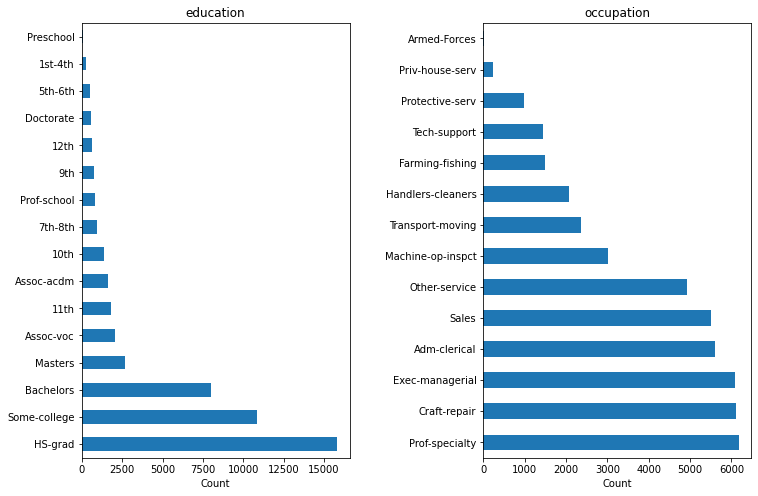

In [ ]:
# Explore education & occupation distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
df.education.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('education')
ax[0].set_xlabel('Count')
df.occupation.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('occupation')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

* The high amounts of people in the dataframe are high school graduates or have college degree.
* High amounts of people had jobs in craft-repair, exceutive-managerial, administrative-clerical, sales and professional specialty.

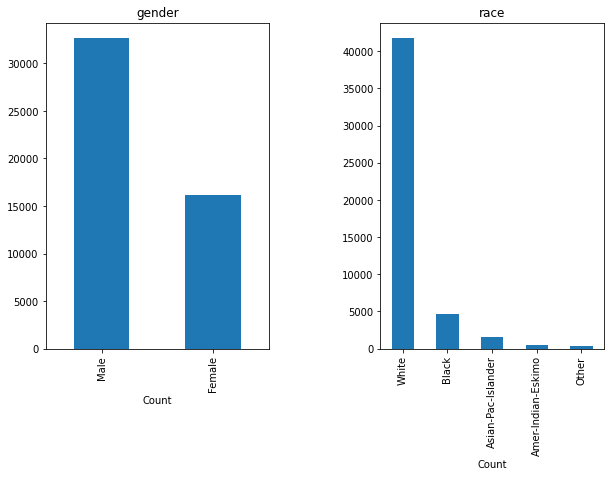

In [ ]:
# Explore education & occupation distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
df.gender.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('gender')
ax[0].set_xlabel('Count')
df.race.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('race')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

* There are twice men in dataset
* High amounts of people had jobs in craft-repair, exceutive-managerial, administrative-clerical, sales and professional specialty.

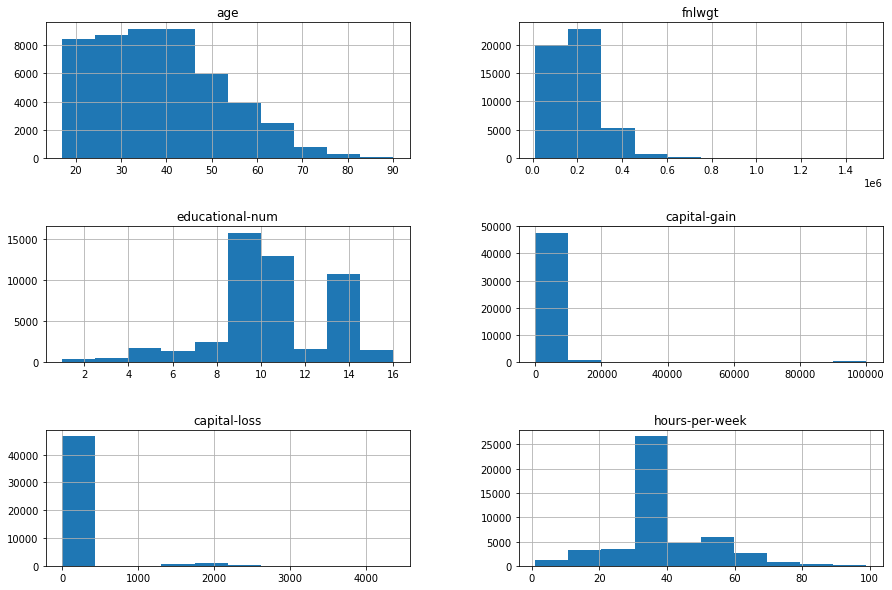

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

* Most of the people were in age range of 18-46 years old.
* Most of people worked between 30-40 hours.

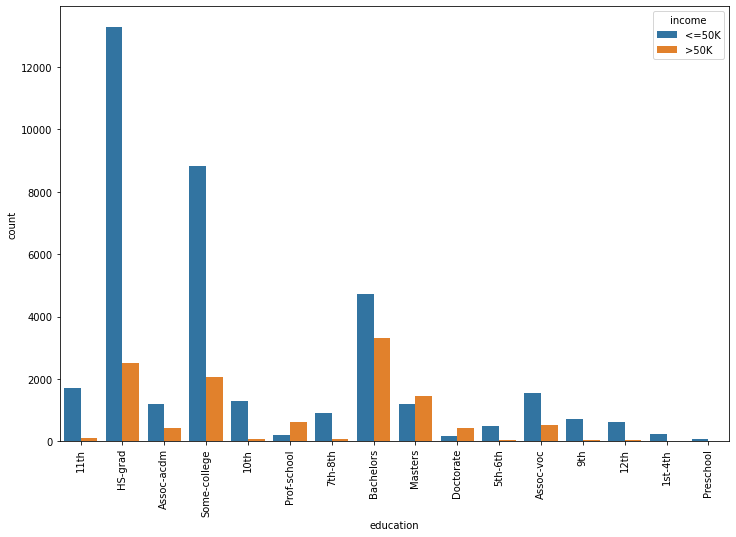

In [ ]:
# Education Effect on Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation='vertical');


* Most of low income people have less education.(high school or less)
* Most of high educated people earn more salary. (Masters, Doctorate)
* Bachelor degree people have both high and low income levels.

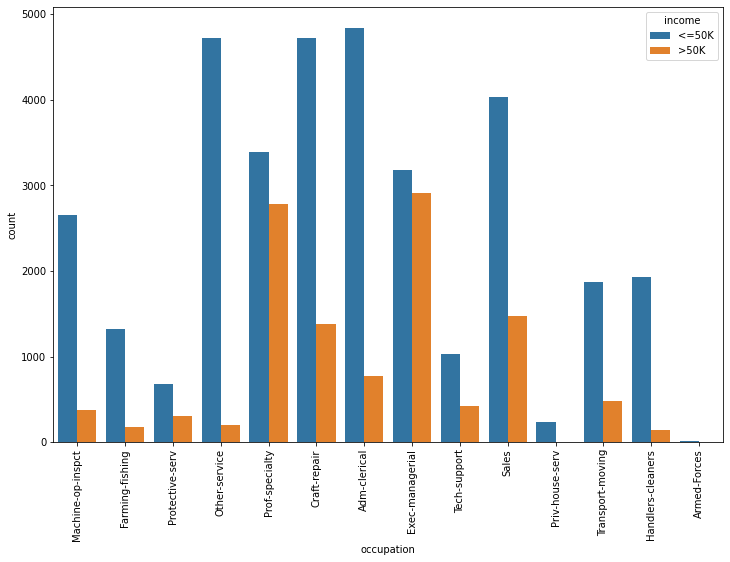

In [ ]:
# Occupation Effect on Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='occupation', hue='income', data=df)
plt.xticks(rotation='vertical');

* Low income jobs are administrative, cleaning and house service jobs.
* High income jobs are mostly, excec-managerial and prof-sepecialty jobs.

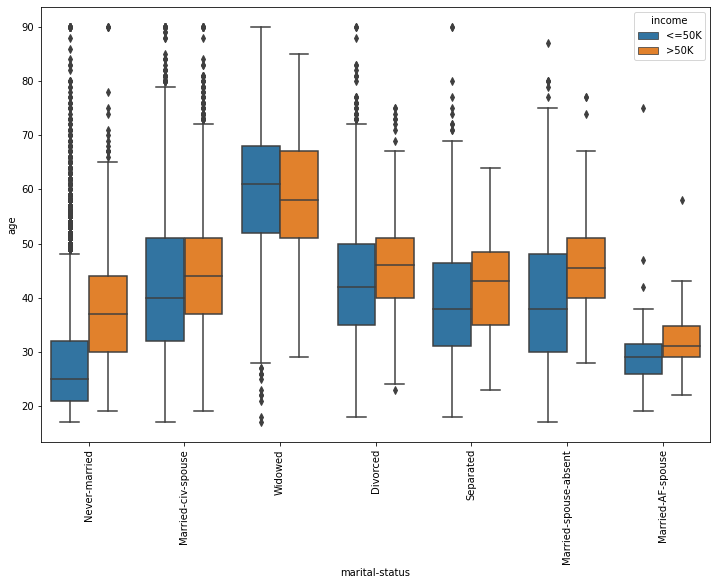

In [ ]:
#Marital status Effect on Income
plt.subplots(figsize=(12, 8))
sns.boxplot(x='marital-status',y='age', hue='income', data=df)
plt.xticks(rotation='vertical');

* The never married people with low income are mostly young.
* The low and high income widowed people had high age between 50-60 years old.


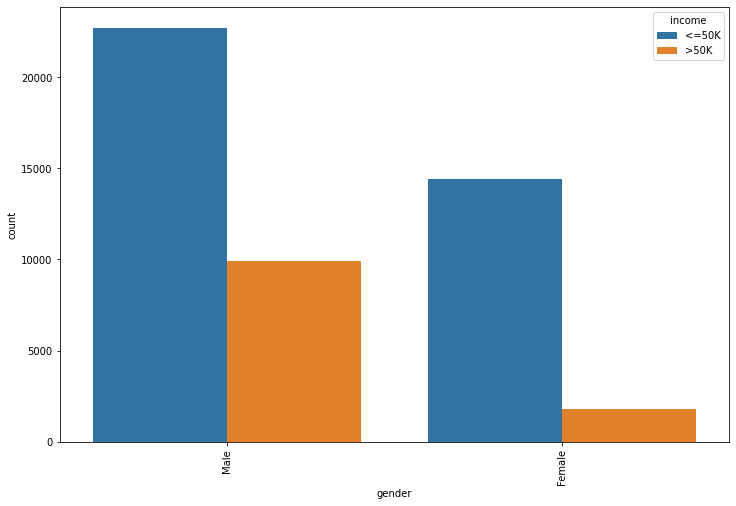

In [ ]:
#Gender effect on Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='gender', hue='income', data=df)
plt.xticks(rotation='vertical');


* There are more high earning professionals in men than women.

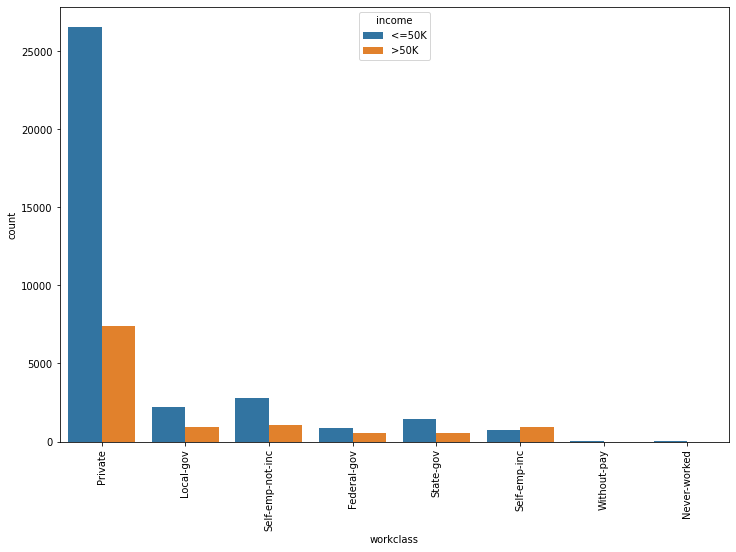

In [ ]:
#Workplace Hours Effect on Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='workclass', hue='income', data=df)
plt.xticks(rotation='vertical');

* The majority of high and low income people are in the private sector.


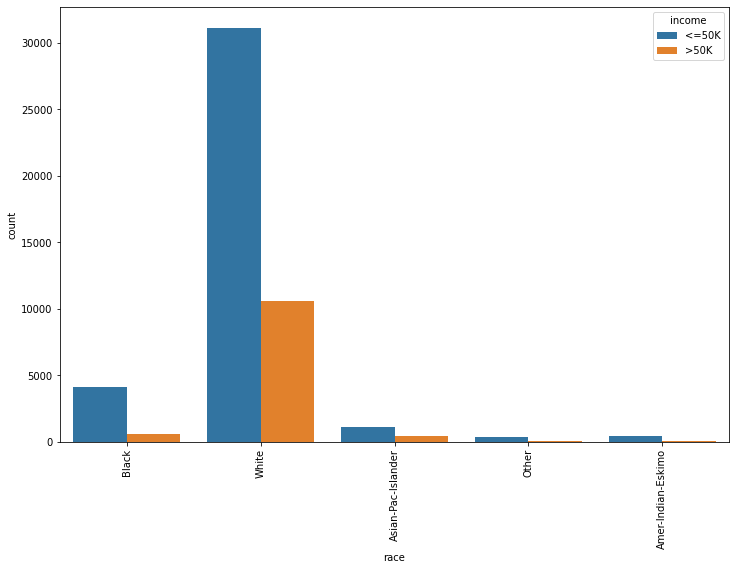

In [ ]:
#Race Effect On Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='race', hue='income', data=df)
plt.xticks(rotation='vertical');

* The ratio of black people with high income is lower than ratio of white people with high income.

In [ ]:
df['age_quartile']=pd.qcut(df['age'], q=4, precision=1)
df['age_quartile'].value_counts()

(16.9, 28.0]    13292
(37.0, 48.0]    12347
(28.0, 37.0]    11682
(48.0, 90.0]    11521
Name: age_quartile, dtype: int64

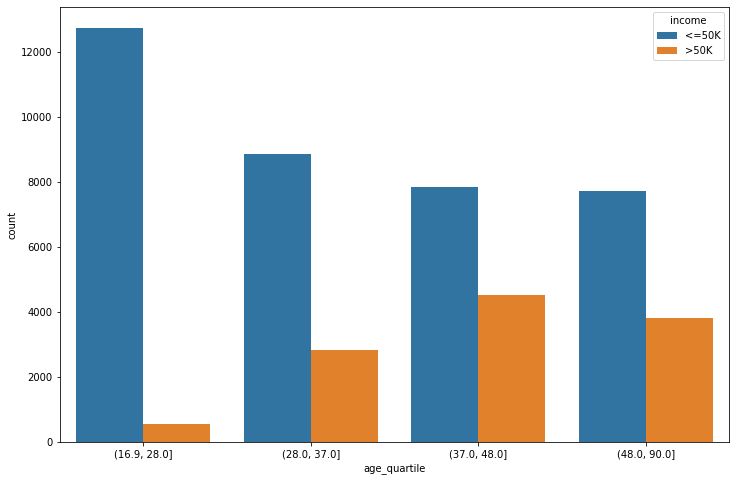

In [ ]:
# Age Effect on Income
plt.subplots(figsize=(12, 8))
sns.countplot(x='age_quartile', hue='income', data=df);


* Most of the low income people are young.
* There are more high income people in the age range of 37-48 years old.
* With increasing age the portion of low income people decreased.

Now let's answer the questions we had from the beginning:
1. How age affect the people income?
Answer: With increasing age, people earned more, but there are more people with higher income in ages between 37-48.

2. How workclass affect the people income?
Answer: Most of the people with salary lower or higher than 50k are in the private sector.

3. How education affect the people income?
Answer: High educated people earn more.(Masters or doctorate degree). Most of the people with low salary are high-school grads.

4. How occupation affect the people income?
Answer: Low income jobs are administrative, cleaning and house service jobs. High income jobs are mostly excec-managerial and prof-sepecialty jobs.

5. How race affect the people income?
Answer: The ratio of black people with high income is lower than ratio of white people with high income.

6. How gender affect the people income?
Answer: There are more high earning professionals in men than women.